<a href="https://colab.research.google.com/github/SandhyaBaskaran/assignment0_FNN/blob/main/createFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
from keras.datasets import fashion_mnist
import numpy as np


In [96]:
%%time
fashion_data = fashion_mnist.load_data()
##sweep pending

CPU times: user 450 ms, sys: 44 ms, total: 494 ms
Wall time: 567 ms


In [97]:
import pandas as pd
pd_df = pd.DataFrame(fashion_data)

In [98]:
train_data_x = pd_df[0][0]
train_data_y = pd_df[1][0]
test_data_x = pd_df[0][1]
test_data_y = pd_df[1][1]

In [99]:

def  one_hot_encode(y,length):
    a = []
    for i in range(0,length):
        if y==i:
            a.append(1)
        else:
            a.append(0)
    return a

In [100]:
# train_data_y = one_hot_encode(train_data_y,10)
# test_data_y = one_hot_encode(test_data_y,10)

In [101]:
indices={}
count=0
for y in train_data_y:
    
    if y not in indices.keys():
      indices[y]=count
    count = count + 1
    if len(indices.keys())==10:
      break


In [102]:
indices

{0: 1, 1: 16, 2: 5, 3: 3, 4: 19, 5: 8, 6: 18, 7: 6, 8: 23, 9: 0}

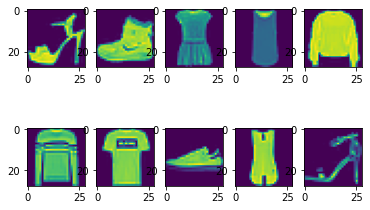

In [103]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec
fig = plt.figure()
row=0
col=0
plot = gridspec.GridSpec(2,5)
for every_class in indices:

  fig.add_subplot(plot[row,col])
  matplotlib.pyplot.imshow(train_data_x[every_class])
  col=col+1
  if col==5:
    col=0
    row=1


In [104]:
import math

def activation_fn(z):
    #sigmoid activation function
    return (1/(1+math.exp(-z)))  #- sigmoid dint work as it saturated quickly for all a values
    ##RELU
    #return max(0,z)



In [105]:
def input_layer(input,hidden_neurons=9,weights= [],bias_updated_weights=[]):

    neurons=[]
    a_val = []
    weight_val = []
    n = 10 #number of neurons in hidden layer
    if not weights:
      b_i = []

      for n in range(0,hidden_neurons):
          a = 0 
          w = []
          bias_weight = np.random.uniform(0.1,high=1)
          for x in input:
              weights=np.random.uniform(0,high=1)
              a = a + np.dot(weights,x)
              w.append(weights)
          a = a+bias_weight
          b_i.append(bias_weight)

          weight_val.append(w)
          a_val.append(a)
      for a in a_val:
          n = np.array(a)/max(a_val)
          neurons.append(activation_fn(n))

      return neurons,weight_val,a_val,b_i

    else: 
      for n in range(0,len(weights)): 
          a = 0 
          c = 0
          bias = bias_updated_weights[n]
          for x in input:
              wi = weights[n][c]
              a = a + np.dot(wi,x)
              c = c+1
          a = a + bias
          a_val.append(a)
      for a in a_val:
          n = np.array(a)/max(a_val)
          neurons.append(activation_fn(n))    

      return neurons,a_val


In [106]:
def hidden_layer(h,layer_updated_weights=[],bias_updated_weights=[],h_val=[],a_val=[],net_val = []):

      b_i = []
      if not layer_updated_weights:
          h_i = []
          a_i = []
          net = []
          for i in range(0,9):  ###assuming each hidden layer has 9 + 1 nodes ## To BE changed
              bias = np.random.uniform(0.1,high=1)
              a = 0
              w_i =[]

              for x in h:
                  weights= np.random.uniform(0,high=1)
                  a = a + np.dot(weights,x) 
                  w_i.append(weights)
              a = a+bias
              b_i.append(bias)
              net.append(a)
              a_i.append(w_i)
              h_i.append(activation_fn(a))
          return h_i,a_i,net,b_i

      else:

          h_i = []
          net = []
          for n in range(0,len(layer_updated_weights)):
                bias =  bias_updated_weights[n]
                a = 0 
                c = 0
                for x in h:
                  weights = layer_updated_weights[n][c]
                  a = a + np.dot(layer_updated_weights[n][c],x)
                  c = c+1
                a = a+bias

                net.append(a)
                h_i.append(activation_fn(a))

          return h_i,net





        

In [180]:
def output_layer(h,classes,weights= [],bias_weights = []):
    h_val = []
    b_i = []
    if not weights:
        weights = []
        for k in range(0,classes):
            bias = np.random.uniform(0,1)
            a_val = 0
            w_i =[]
            for a in h:
                weight = np.random.uniform(0,1)
                a_val += (weight * a)
                w_i.append(weight)
            a_val = a_val +bias
            weights.append(w_i)
            h_val.append(a_val)
            b_i.append(bias)
        h_val = np.array(h_val) /max(h_val)
        return softmax(h_val),h_val,weights,b_i
    else:
        for k in range(0,classes):
            bias = bias_weights[k]
            a = 0
            c=0
            for a in h:
                weight = weights[k][c]
                a += (weight * a)
                c = c+1
            a = a +bias
            h_val.append(a)
        h_val = np.array(h_val) /max(h_val)
        return softmax(h_val),h_val



In [108]:
def softmax(x):
    return (np.exp(x)/np.exp(x).sum())

In [109]:
def pd_lossFn(y_hat,L): ##cross entropy
    # if y_hat==y:
    #   return -(1/y_hat)
    # else:
    #   return 0
    return -(L/y_hat)


In [110]:
def pd_softmax(x):
    return x * (1- x)


In [111]:
def pd_activation(x):
    return (x * (1-x))

In [112]:
#def pd_activation(x): ## RELU
    # if x < 0:
    #   return 0
    # else:
    #   return 1

In [113]:
def loss_Fn(y,y_hat):
    l = - (np.dot(y,np.array([math.log(x) for x in y_hat]))) ##cross entropy
    return l
    


In [207]:
def fnn(train_data_x,train_data_y,layer_updated_weights = [],bias_updated_weights = []):

      h_val =[]
      a_val = []
      net_val = []
      bias_weights = []
      if not layer_updated_weights:
          h,input_weights, input_net, b = input_layer(train_data_x.astype('float128')[0].flatten()/255.0,9)
          net_val.append(input_net)
          a_val.append(input_weights)
          h_val.append(h)
          bias_weights.append(b)
          for i in range(0,3): ##hidden layers
              h_val_temp,a_val_temp,net_val_temp,b = hidden_layer(h)
              h_val.append(h_val_temp)
              a_val.append(a_val_temp)
              net_val.append(net_val_temp)
              h = h_val_temp
              bias_weights.append(b)
          h_output,net,a_output,bias = output_layer(h_val[-1],10)
          net_val.append(net)
          bias_weights.append(bias)
          y = one_hot_encode(train_data_y[0],10)
          loss_val = loss_Fn(y,h_output)
          print(loss_val)
          layer_updated_weights,bias_updated_weights = backpropogation(y,h_output,h_val,net_val,a_output,bias_weights,a_val)
          
      else:
          print(len(layer_updated_weights))
          h, input_net = input_layer(train_data_x.astype('float128')[0].flatten()/255.0,9,layer_updated_weights[0],bias_updated_weights[0])
          net_val.append(input_net)
          h_val.append(h)
          for i in range(1,len(layer_updated_weights)-1): ##hidden layers
              h_val_temp,net_val_temp = hidden_layer(h,layer_updated_weights[i],bias_updated_weights[i])
              h_val.append(h_val_temp)
              net_val.append(net_val_temp)
              h = h_val_temp
          h_output,net = output_layer(h_val[-1],10,layer_updated_weights[-1],bias_updated_weights[-1])
          y = one_hot_encode(train_data_y[0],10)
          net_val.append(net)
          loss_val = loss_Fn(y,h_output)
          print(loss_val)
          layer_updated_weights,bias_updated_weights = backpropogation(y,h_output,h_val,net_val,layer_updated_weights[-1],bias_updated_weights,layer_updated_weights[:-1])## to be modifie
      return layer_updated_weights[::-1],bias_updated_weights[::-1]




In [203]:
def backpropogation(y,h_output,h_val,net_val,a_output,bias_weights,layer_updated_weights):
          Loss_val = 0.1
          L = loss_Fn(y,h_output)
          grad_l = pd_lossFn(L,h_output)
          grad_h = []
          for i in h_output:
            grad_h.append(pd_softmax(i))

        
          ##last layer
          layer = -1
          updated_weights = []
          updated_bias_weights = []
          node  = 0
          for weights in a_output: ##not considering bias
            u = []
            for w in weights:
                w = w - (-grad_l[node] * grad_h[node] * net_val[layer][node])
                u.append(w)
            updated_weights.append(u)
            node = node + 1
          layer_weights = []
          layer_weights.append(updated_weights) ###output_layer
          grad_h_hidden = []
          weights = []
          for i in h_val[::-1]:## each layer
            h = []
            for node in i:
              h.append(pd_activation(node)) 
            grad_h_hidden.append(h)

          layer_no = -1        
          for weights in layer_updated_weights[::-1]:## weights
              w_i = 0
              node  = 0
              updated_weights_hidden = []

              for n in weights:
                
                u = []
                if -(layer_no) != len(layer_updated_weights):
                  for w in n:
                      w = w - (-grad_l[node] * grad_h_hidden[layer_no][node] * net_val[layer_no-1][node])
                      u.append(w)
                  updated_weights_hidden.append(u)
                  node = node + 1
                else:

                  for w in n:
                      w = w - (-grad_l[node] * grad_h_hidden[layer_no][node])
                      u.append(w)
                  updated_weights_hidden.append(u)
                  node = node + 1
              layer_weights.append(updated_weights_hidden)

              layer_no = layer_no -1
          n = -1
          grad_b = grad_l
          l = -1
          for bias in bias_weights[::-1]:
            b_i = []
            for b in bias:
                b = b - ( grad_b[n] * b)
                b_i.append(b)
            grad_b = grad_h_hidden[l]
            updated_bias_weights.append(b_i)
            
          return layer_weights,updated_bias_weights 






In [198]:
l,b = fnn(train_data_x,train_data_y)


2.258786933248833
4


In [193]:
print(len(l))
print(len(b))

5
5


In [211]:
u_l,l_b = fnn(train_data_x,train_data_y,l,b)

5
2.2779573905404553


In [217]:
u_l,l_b = fnn(train_data_x,train_data_y,u_l,l_b)

5
2.2396691065458825


In [ ]:
# [0.9714544591005236, 0.08583843249627232, 0.6691569056540868, 0.5707823895730559, 0.9193098875843406, 0.6004719941895609, 0.01261900080013445, 0.9290756195137145, 0.261417504344127, 0.5741677035261091, 0.1770639362969061, 0.1989022095893268, 0.7712052408114826, 0.6975221008712802, 0.8705577415080529, 0.823120317930961, 0.30831833148976295, 0.025912900291206298, 0.6266611051340268, 0.5763334419265957, 0.725301178557957, 0.7141832913662793, 0.6466910372912746, 0.4985590236846721, 0.6650260717049938, 0.18812583677199812, 0.48137157807688746, 0.18745149266482442, 0.3757136148710062, 0.7482421211769785, 0.9189123795913762, 0.9996269242603273, 0.5856801755405343, 0.19869702040774806, 0.49008399633974686, 0.5775135760247294, 0.716070439990485, 0.5408638682446235, 0.22366077600431145, 0.7766087305244622, 0.9944244554732287, 0.7660533563946823, 0.8903738287291593, 0.07834925236408208, 0.46345625317734573, 0.2576918351254318, 0.41749030483756266, 0.9346034512141504, 0.32825905793383936, 0.9295892964086284, 0.11028287697288075, 0.5004514135772763, 0.004228980304655906, 0.6518541768658798, 0.9078966503560292, 0.6386467886776391, 0.6732538423056672, 0.1734018518870476, 0.9962894233846951, 0.7169706676331391, 0.7836660816820384, 0.9536184239395223, 0.13753231796294763, 0.8283981521988268, 0.11127420287152145, 0.5211435928731181, 0.061439854308054875, 0.8504501746090183, 0.14893073559627157, 0.7019498978274721, 0.3232948183574682, 0.913114973653561, 0.8181798046440686, 0.13024296229653032, 0.7340733257088518, 0.27130155357343344, 0.12765438057627287, 0.4275597754842895, 0.8104549935748581, 0.5701100117541641, 0.8914917510074023, 0.5331737224477516, 0.3843195913576012, 0.9288548501661539, 0.5898426765824499, 0.1942335865420005, 0.2743082087705462, 0.45862125838992185, 0.5855145748432555, 0.6957380528744569, 0.7756345691609404, 0.7927237399520806, 0.8998043453126325, 0.08307562083449027, 0.39711389768911165, 0.5354919144889992, 0.552504114685601, 0.5260897600701293, 0.8662144289010313, 0.04438841979949759, 0.5419905952111803, 0.7975655228643611, 0.232032305105204, 0.12551918169328402, 0.9399802622264539, 0.22053888819738754, 0.3047667992353147, 0.03339908337204245, 0.48729386306716294, 0.8683426889474143, 0.0414748192366603, 0.01948902436384181, 0.012426163719126304, 0.8854516052656749, 0.46468835923750373, 0.8924660784902131, 0.2601526821610446, 0.6352527863906814, 0.1100014174259254, 0.9047918199578271, 0.6842089700754842, 0.09279751036413864, 0.9834305342840921, 0.06340914915268925, 0.10486867769154518, 0.7572578547989944, 0.08602637956325654, 0.8599595798582527, 0.2003512022986933, 0.2100814753695096, 0.49983147695027375, 0.1072440562841066, 0.8284642466803933, 0.9012963197759093, 0.659163229956309, 0.386566335810571, 0.925952903825597, 0.14108358189084647, 0.12148906167511986, 0.26234589248801277, 0.11166850796354488, 0.6170089820934687, 0.741559895106691, 0.9792732426001034, 0.804144492824399, 0.6711356540340789, 0.3151189743796792, 0.06423090476266935, 0.8884873800583438, 0.047622913698883496, 0.8252334546316482, 0.29395772287186506, 0.07742670830116105, 0.7163972616493763, 0.6113284376042605, 0.8566314353470197, 0.9179781756751446, 0.39638424579483167, 0.05329209933448842, 0.30915225915284616, 0.4879055007229305, 0.9190396102286572, 0.985621829562729, 0.6866620597583469, 0.6244638244696578, 0.7529190769661206, 0.40342901208649273, 0.7523162193786075, 0.2189882905077697, 0.2102435415402203, 0.3612676479087005, 0.7573932488083618, 0.4324682734362595, 0.2983724854310904, 0.2404285896903955, 0.1797987160307296, 0.08074288603349311, 0.4912330172574848, 0.18472077598540482, 0.838996535458935, 0.9823614916974549, 0.023175987459308933, 0.5452665091851335, 0.32866293324095075, 0.31103146303984586, 0.6507537722148588, 0.9038313484478697, 0.8081252022930165, 0.37374389087131776, 0.012138249236293364, 0.2851903001978249, 0.6905907293313563, 0.7764065437687308, 0.9238718804670927, 0.3764795177778886, 0.5048108781179769, 0.28015955940965986, 0.633121555382061, 0.5332433357951079, 0.6844758573131355, 0.6266563580932083, 0.5329471543803348, 0.7231341318961395, 0.0242215534143011, 0.8023977296701278, 0.4150222894686476, 0.6066199897262932, 0.6661307549950383, 0.7511740134485891, 0.14804943788980462, 0.5108208483365317, 0.05240878239245872, 0.24578782137482846, 0.9724637091424239, 0.9915146174018832, 0.5689971444179364, 0.031648709296312805, 0.35176701560946266, 0.3484933653439892, 0.01732530182687031, 0.9793709604817992, 0.03021930807851525, 0.5420872887282612, 0.2817891647503933, 0.754559524634262, 0.49602930080619156, 0.2365383734288824, 0.9453268823242919, 0.27202300740404395, 0.3930209437129645, 0.21734273472233556, 0.2596017273567851, 0.8996126908107435, 0.19286743648207338, 0.02610115907212518, 0.454930444172577, 0.48471150700528076, 0.21793965643517, 0.5350029076174535, 0.728493333441872, 0.4865823563871666, 0.04035246113349, 0.8426975910488518, 0.9091773419663878, 0.4575689415989579, 0.6851421727636439, 0.2734707674711998, 0.04780972583160836, 0.1164108695041779, 0.49047723333712856, 0.7588620412471648, 0.3817342320136635, 0.6935640107415703, 0.7612497543291029, 0.4783847688800963, 0.9723933617915825, 0.01587910291223993, 0.868057149330885, 0.9238593772971191, 0.22798397896796796, 0.8298911825932788, 0.6672969191126352, 0.7570035646684519, 0.3694120803681398, 0.2591192311818673, 0.3541754233565605, 0.455297190490896, 0.8816497801571861, 0.3226884417227508, 0.9491283661594987, 0.6577118667779666, 0.6656836384796825, 0.1541041762275407, 0.763322641950996, 0.32772628590972497, 0.3407847859857748, 0.9627782495375361, 0.9724978134790955, 0.38179775919636116, 0.4086411788855704, 0.9400341801325217, 0.903679595724583, 0.5194015610612548, 0.521298282890501, 0.04040553488901655, 0.737956002833404, 0.8237059146675985, 0.46382332569427376, 0.5497399548036669, 0.16046927137783684, 0.9387987325416293, 0.25050441462517425, 0.4753626809478625, 0.8154287443730416, 0.7693752406644535, 0.4937680902457945, 0.14679943451408517, 0.7900403934210822, 0.667551092670587, 0.24807578544932907, 0.825527009004178, 0.9734606327545816, 0.0503510008718554, 0.042818376362402044, 0.267121943652072, 0.269463081878371, 0.6279505694574522, 0.4262792932392462, 0.7067267179123484, 0.3201257041384661, 0.876799153759652, 0.6673698606706777, 0.2935388837354014, 0.11476983806444974, 0.6837174320947101, 0.048203962721826144, 0.891507098647453, 0.19046915764710914, 0.540431771053933, 0.21768816986535178, 0.31000877014349004, 0.3479246114512632, 0.15619642991662408, 0.012275515304761453, 0.41987422831900734, 0.7092448730538973, 0.31302567314638086, 0.23248119810746615, 0.04006150396173347, 0.28551646655832796, 0.45129356112925934, 0.9199260741491966, 0.5114126029313382, 0.2360748467547107, 2.268676282502385e-06, 0.8318368869028163, 0.5511204366713692, 0.34237250258128127, 0.16304455553849562, 0.4993308992163036, 0.9182870851827086, 0.49640927923266365, 0.6553837408868384, 0.7210301973445506, 0.21428129919946826, 0.7053142222873886, 0.6008231221587985, 0.5964245790121899, 0.32785887993048446, 0.17674572168227531, 0.7311624654809059, 0.2835660822011199, 0.2497968264096725, 0.4325062261770639, 0.30968556221728305, 0.21863103045236665, 0.951058039128316, 0.37193363018353176, 0.6084627195671627, 0.03382348430926141, 0.6729771917500537, 0.4960625680456159, 0.730025865965251, 0.02801387590568094, 0.43387500197428486, 0.2211883344501705, 0.3097174718351752, 0.5555585962395952, 0.5263097628622123, 0.14872925301824458, 0.34170832005024887, 0.9000135067369376, 0.8163522778504578, 0.8130082928850932, 0.14687844253239302, 0.5574616265757425, 0.7603232771455405, 0.3422677772735756, 0.7016756181016842, 0.6468434509439374, 0.35261467312981076, 0.06131274788910146, 0.8035802574536126, 0.18795338911582093, 0.8725436285127793, 0.7278888672962325, 0.5344626135895858, 0.05285341853922776, 0.6285014806334565, 0.43618642157307563, 0.16237917639996724, 0.7254204806455916, 0.7804138146673377, 0.03305442257057001, 0.8769620714404412, 0.582870088332389, 0.45368276770785354, 0.33337293269881807, 0.3954060134243862, 0.9035042276412578, 0.4324672238905173, 0.46154295658724365, 0.10302766944913111, 0.12077141239621814, 0.26769750169645157, 0.8044938115681946, 0.9693615957859222, 0.6655424740025355, 0.5608592217952453, 0.3328972598010952, 0.9795307851285235, 0.2516507091833592, 0.14460379795976808, 0.935468924104956, 0.4749528757783168, 0.9912792159855043, 0.42018952876460014, 0.04915511315158394, 0.9371909329148901, 0.4004101522159864, 0.6946568987507242, 0.12256917638901665, 0.8810675411586997, 0.9392366659462617, 0.23899144713974985, 0.8398890856245412, 0.589725364689998, 0.09744625870455936, 0.4347452760795518, 0.19979427643207492, 0.026380232434472184, 0.3586285248721276, 0.8165702828673863, 0.3158392937705937, 0.6335276266991333, 0.26939559095574783, 0.12764695864738662, 0.37765416017873743, 0.9856491965775537, 0.7777620968032202, 0.8922703414708607, 0.11477272602329047, 0.7197236660466865, 0.24617865825798346, 0.5364916650376347, 0.12244238552954256, 0.8327099633527507, 0.7996503407814988, 0.714201243950023, 0.6203091840214642, 0.46018822163464257, 0.8840772388166018, 0.41130191661126636, 0.8848337721506883, 0.1504226344430959, 0.962821888817688, 0.3154808344780179, 0.9853886306106884, 0.4363750629364779, 0.8477260274729793, 0.20366207526928903, 0.44514726231581914, 0.3234235879506616, 0.18127643219076806, 0.615038850721319, 0.3118670490249634, 0.21593775781873215, 0.39373183705652703, 0.6636881873467058, 0.28334231298792256, 0.6924987913837939, 0.0494352078159378, 0.2075509164130641, 0.18394599190887295, 0.6704519466367462, 0.2936949133002962, 0.5105223319695601, 0.9486361914617307, 0.5930465238845268, 0.3374648199468233, 0.7307362718463878, 0.6598885317751126, 0.8388086551172905, 0.3078884252032449, 0.16375474674077717, 0.8026257915489776, 0.43196714416601323, 0.8834914797503571, 0.038799538112007315, 0.6617630523055028, 0.3661029090432374, 0.537721975278468, 0.8334577811333922, 0.5461429454059965, 0.3932073987532254, 0.2754581474157758, 0.2845084183440949, 0.12182239988711341, 0.37743459811120816, 0.23261178709450236, 0.5843457628464038, 0.69828121547991, 0.2253430626155717, 0.4152212745374466, 0.6957706509838765, 0.5382609627861651, 0.6215227075889181, 0.9022357531512966, 0.29665339972040417, 0.44657800877867637, 0.2628714997633309, 0.032435765743863754, 0.9837711284103281, 0.7631549539173228, 0.028994277891804643, 0.23739235886850918, 0.813826777524586, 0.06054094682838973, 0.04446367024818865, 0.45867280890242024, 0.217433870781653, 0.9461620614359789, 0.4583841975385603, 0.8257535490755993, 0.07965501245605944, 0.4960746101162652, 0.18445881404286868, 0.004237606503094683, 0.27468224790508544, 0.20516835625173158, 0.12037897952112009, 0.9337475543826558, 0.10270322890781214, 0.7567026798141608, 0.34531078484598754, 0.29815063933247865, 0.1677402542088875, 0.4227315480828867, 0.3330504201239374, 0.4841472085909536, 0.1419941235195079, 0.8354323048732918, 0.26012138073264934, 0.0674312031205403, 0.5308721288316272, 0.38276904481140483, 0.6599622792821468, 0.14847847300296102, 0.035344714194785465, 0.9585937502814386, 0.5748853572996059, 0.8287701777330413, 0.6149974931460542, 0.4489400615269855, 0.34242292898336535, 0.08355048953613553, 0.08201308304496935, 0.5780220323815026, 0.6898028500259513, 0.08566717554743108, 0.6031339318882453, 0.11718494955585701, 0.43260251800440863, 0.4965186093982692, 0.6436430527923916, 0.6033547593109394, 0.22488030784089486, 0.7496967961208924, 0.5707572595281487, 0.15918533905809185, 0.4240761148110428, 0.15176216680583643, 0.3272420536592323, 0.5815280076589192, 0.3688953331392709, 0.22659257135478517, 0.7752585106859945, 0.6868897265204539, 0.7391601725327283, 0.4438206288887051, 0.9189362989934183, 0.5139567594468049, 0.9636794625622366, 0.524635491416713, 0.4547580774890523, 0.7802055579423681, 0.9716234202830794, 0.8655638151533968, 0.9945049782637264, 0.13205525707778532, 0.4619613071598493, 0.9480197235246434, 0.08447803703434098, 0.26820840674804103, 0.7361195162311497, 0.554826966127827, 0.09419089149639803, 0.9627818029354369, 0.1487410088578135, 0.6301899333115114, 0.08542762429033102, 0.6269719748629807, 0.14388480218343858, 0.9593113115230455, 0.5875183339476315, 0.09443898803300788, 0.14083575736989062, 0.8796071491056509, 0.9711289157209115, 0.21312611211142107, 0.6589437069721997, 0.955258056581004, 0.11114091091158929, 0.17521751189646828, 0.0487344308326102, 0.48971106415501076, 0.7365804907669871, 0.21216615553270857, 0.8779957614833472, 0.04847564402068605, 0.23577537751490063, 0.9218698286722556, 0.4457564690069318, 0.3405916876768189, 0.03281810495476223, 0.02560253577446925, 0.4678874780102915, 0.009175625765233897, 0.19640739783975703, 0.5499101336592737, 0.9827559000695238, 0.9043605015356598, 0.6228194483713868, 0.29226218029522544, 0.15596608096459474, 0.020523957008636184, 0.48420894444598617, 0.04021959913137285, 0.9970482178283805, 0.9469771430233777, 0.47101669954835546, 0.24868952874687777, 0.6918619420223245, 0.5794359984282882, 0.026817402120350997, 0.2803851434269322, 0.9781126985595827, 0.4255555336757, 0.05739546673602014, 0.110970628703155, 0.808546358904472, 0.6697052921257609, 0.4918069913696812, 0.8635803333376925, 0.8821562284303824, 0.9348067873942105, 0.7910948450395696, 0.061247123410094306, 0.7659957670831163, 0.9423180302639212, 0.803751462536797, 0.5976575617571135, 0.24912710573921093, 0.38370043730786885, 0.8882448782008309, 0.5277430729467002, 0.34495827130644185, 0.5234144696720051, 0.6345882924056275, 0.9437174099339082, 0.3252724525055277, 0.7961747292143715, 0.7286250383232065, 0.5216625807784738, 0.18209627684191632, 0.06527367929220174, 0.3553622104055384, 0.7132480325524237, 0.27295317351889203, 0.1939975163595561, 0.0644338501924493, 0.21889484590785102, 0.5788279174845518, 0.7351794878972121, 0.9566824742563471, 0.7202323273785324, 0.6149889360153244, 0.8994955805417082, 0.6527502830740488, 0.19832244559122103, 0.6918562116589163, 0.6182354875496254, 0.9156775818246565, 0.14567808160528883, 0.6247470404681607, 0.6001374558564208, 0.505594302574246, 0.2611249573042501, 0.31833294313324967, 0.18332595126461715, 0.16087544870662984, 0.8163005734560983, 0.1996711141592059, 0.6580718746653911, 0.17837360611413822, 0.1992708206776279, 0.23301431308014808, 0.43998379672004373, 0.6054019465694723, 0.6040900968485193, 0.16031286816563184, 0.5008527498875734, 0.6897699464944423, 0.7348526861092645, 0.5029624408209291, 0.9425357012749791, 0.6054955516052603, 0.8121994673299919, 0.7192827837883256, 0.6827790555987028, 0.4701015717678483, 0.7431129096473181, 0.6053786161098961, 0.2060641839664491, 0.4156775231155817, 0.5481028236230541, 0.46114182974399465, 0.8149537857420547, 0.9484981277306302, 0.9663180712763609, 0.4902344639296565, 0.18051436153524736, 0.8422421399459572, 0.37572925371054633, 0.22237866826303054, 0.0960881067379109, 0.919904470336361, 0.27129891648095295, 0.23522297745019116, 0.9644769423753884, 0.6706861573952384, 0.7544950236546051, 0.058899678791965004, 0.8381135797095032, 0.5249228927913903, 0.7666120452775844, 0.3141816045482322, 0.8203359431212628, 0.15831692093742133, 0.3068022721528151, 0.3681322701103735, 0.5348963372635608, 0.5616642385307725, 0.09624962051322328, 0.2814207144211861, 0.812242534493476, 0.044469884735615195, 0.328948964407932, 0.7991831199455909, 0.42375199961002696, 0.4900233440327436, 0.31669893446550224, 0.46407985725417256, 0.03951651951774482, 0.5389446634149008, 0.8682641140755197, 0.13463417521357568, 0.8555924442867534, 0.4733918567096749, 0.6415020931740862, 0.4710098845195131, 0.6262315492209557, 0.1750254530304458, 0.06884778184574747, 0.7440857538340296, 0.6463589641463305, 0.662659914943762, 0.7273322910937279, 0.6334767226334854, 0.7607366124379478, 0.17295856730780934, 0.5351308279156148, 0.45771949624891184, 0.876090222212606]
# [0.11008571 0.1006353  0.09363902 0.11463188 0.11703724 0.08566279
#  0.08861203 0.09725271 0.1035411  0.08890222]

In [ ]:
# for iterations in range(0,10): ##epochs
#     for x in train_data_x.astype('float128'):
#         x = x.flatten()/255.0